# Sales Prediction
Rhaniel Rhett M. delos Santos

This is our first Data Science project in the part-time Data Science Bootcamp by Coding Dojo PH. The objective of the project is to demonstrate fundamental data science skills in data cleaning and preparation, data preprocessing and machine learning to predict sales, present findings to non-technical audience, and recommend insights to business owner on sales

##Data Cleaning

In [133]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
#Read the data from csv file
sales_prediction_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv')
sales_prediction_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [135]:
#Check the information of the dataframe
sales_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [136]:
#Check the shape of the dataframe
sales_prediction_df.shape

(8523, 12)

In [137]:
#There are missing and/or null values in columns 'Item_Weight' and 'Outlet_Size'

#Check for duplicates
sales_prediction_df.duplicated().sum()

0

In [138]:
#Extract duplicate rows
sales_prediction_df.loc[sales_prediction_df.duplicated(),:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [139]:
#Check for the columns with missing data

#'Item_Weight' column:
sales_prediction_df['Item_Weight'].isnull().sum()

1463

In [140]:
#'Outlet_Size' column:
sales_prediction_df['Outlet_Size'].isnull().sum()

#NOTE: There are other aspects in the dataset which need to be cleaned. The cleaning shall be updated as the project proceeds

2410

In [141]:
#Obtain max for item weight
sales_prediction_df['Item_Weight'].max()

21.35

In [142]:
#Obtain min for item weight
sales_prediction_df['Item_Weight'].min()

4.555

In [143]:
#Obtain mean for item weight
sales_prediction_df['Item_Weight'].mean()

12.857645184136183

In [144]:
#Obtain max for MRP
sales_prediction_df['Item_MRP'].max()

266.8884

In [145]:
#Obtain min for MRP
sales_prediction_df['Item_MRP'].min()

31.29

In [146]:
#Obtain mean for MRP
sales_prediction_df['Item_MRP'].mean()

140.9927819781768

In [147]:
# Use value_counts to determine any inconsistencies in the data entries
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [148]:
# Convert entries under column Item_Fat_Content to fix inconsistencies
sales_prediction_df['Item_Fat_Content'] = sales_prediction_df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
sales_prediction_df['Item_Fat_Content'] = sales_prediction_df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
sales_prediction_df['Item_Fat_Content'] = sales_prediction_df['Item_Fat_Content'].str.replace('reg', 'Regular')

# Check again using value_counts
sales_prediction_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [149]:
sales_prediction_df['Item_Type'].value_counts()

# No data inconsistencies

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [150]:
# Convert entries under column Outlet_Identifier to fix inconsistencies
sales_prediction_df['Outlet_Identifier'].value_counts()

# No inconsistencies in the data

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [151]:
# Convert entries under column Outlet_Establishment_Year to fix inconsistencies
sales_prediction_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [152]:
# Check information again
sales_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [153]:
# Check for data inconsistencies in column Outlet_Location_Type
sales_prediction_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [154]:
# Check for data inconsistencies in column Outlet_Type
sales_prediction_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

##Data Visualization

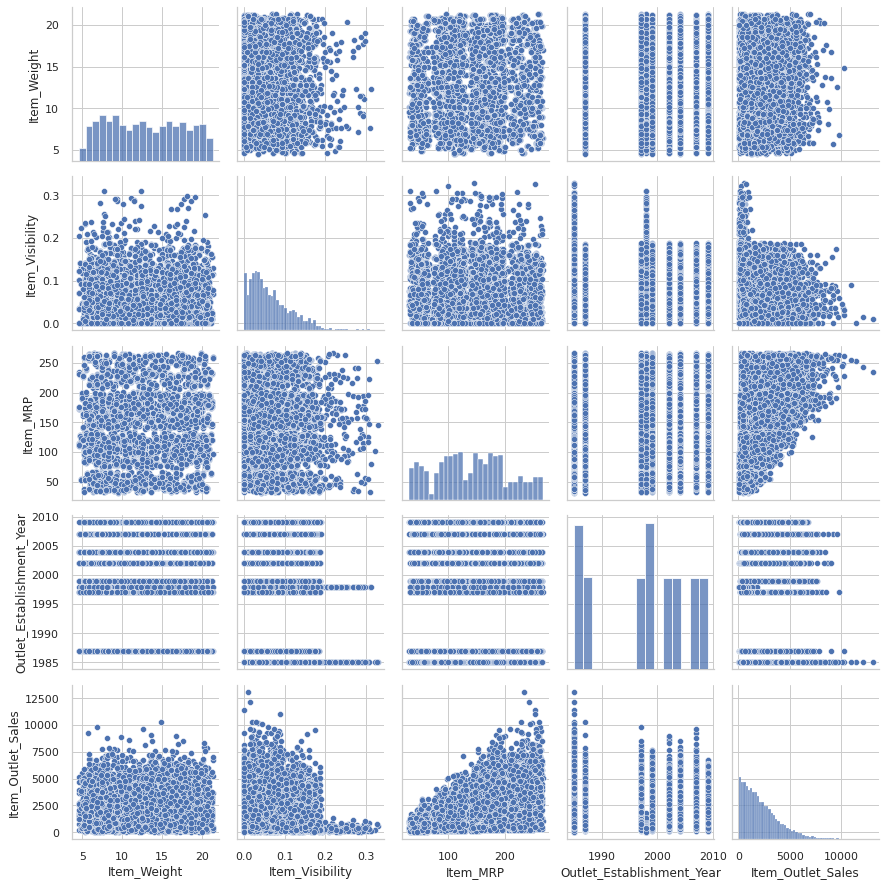

In [155]:
# Use seaborn pairplot to see the initial relationship between the variables
sns.pairplot(data=sales_prediction_df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item Outlet Sales')

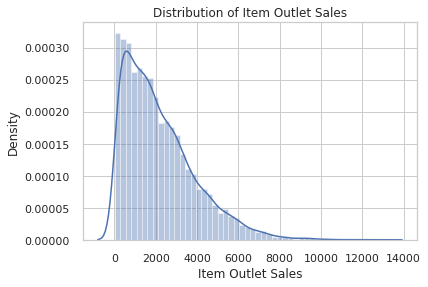

In [156]:
# Distribution of sales
sns.distplot(sales_prediction_df['Item_Outlet_Sales'])
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.title('Distribution of Item Outlet Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item MRP')

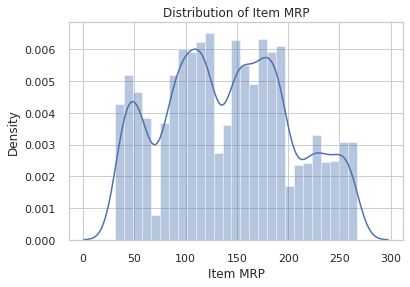

In [157]:
# Distribution of Item MRP
sns.distplot(sales_prediction_df['Item_MRP'])
plt.xlabel('Item MRP')
plt.ylabel('Density')
plt.title('Distribution of Item MRP')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item Visibility')

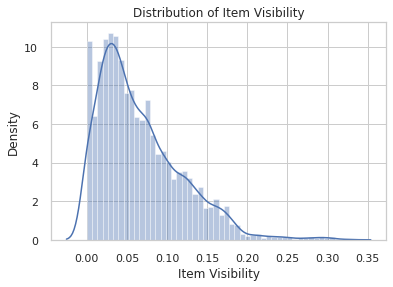

In [158]:
# Distribution of Item Visibility
sns.distplot(sales_prediction_df['Item_Visibility'])
plt.xlabel('Item Visibility')
plt.ylabel('Density')
plt.title('Distribution of Item Visibility')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Item Weight')

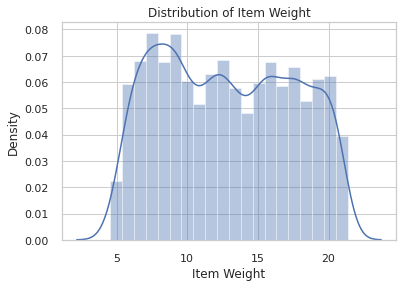

In [159]:
# Distribution of Item Weight
sns.distplot(sales_prediction_df['Item_Weight'])
plt.xlabel('Item Weight')
plt.ylabel('Density')
plt.title('Distribution of Item Weight')

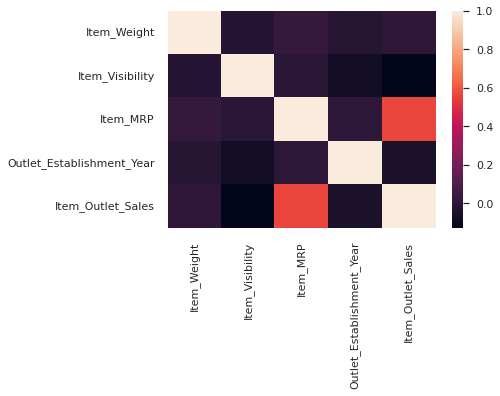

In [160]:
# Create a heatmap for the correlation of each features
sns.heatmap(sales_prediction_df.corr())

Text(0.5, 1.0, 'Item Types vs. Sales')

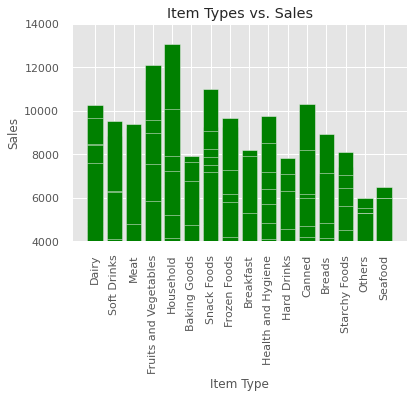

In [161]:
# Which Item Type has highest sales?
plt.style.use('ggplot')
plt.bar(sales_prediction_df['Item_Type'], sales_prediction_df['Item_Outlet_Sales'], data=sales_prediction_df, color='green')
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.ylim(bottom=4000, top=14000)
plt.title('Item Types vs. Sales')

Text(0.5, 1.0, 'Item Fat Content vs. Sales')

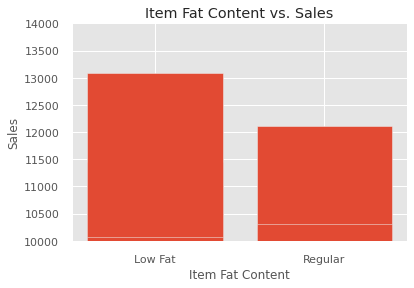

In [162]:
# Distribution of sales based on item fat content
plt.style.use('ggplot')
plt.bar(sales_prediction_df['Item_Fat_Content'], sales_prediction_df['Item_Outlet_Sales'], data=sales_prediction_df)
plt.xticks(rotation = 0)
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.ylim(bottom=10000, top=14000)
plt.title('Item Fat Content vs. Sales')

Text(0.5, 1.0, 'Item Type vs. Number of Items Sold')

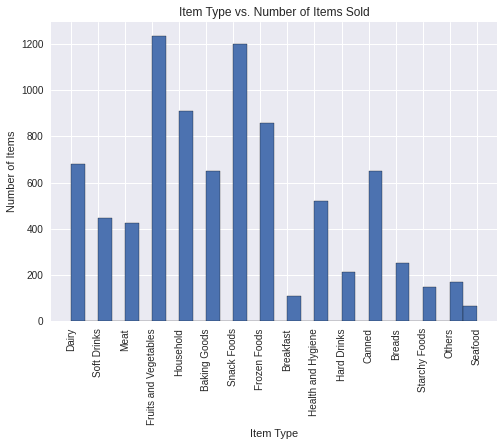

In [163]:
# Distribution of item type
plt.style.use('seaborn')
sales_prediction_df['Item_Type'].hist(bins=30,edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Number of Items')
plt.title('Item Type vs. Number of Items Sold')

Text(0.5, 1.0, 'Item Visibility vs. Sales')

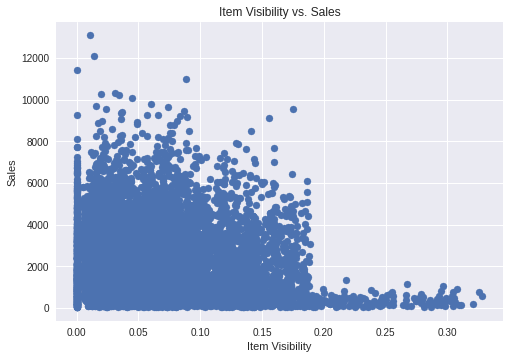

In [164]:
# Scatter plot: item visibility vs. sales
plt.style.use('seaborn')
plt.scatter(sales_prediction_df['Item_Visibility'], sales_prediction_df['Item_Outlet_Sales'])
plt.xlabel('Item Visibility')
plt.ylabel('Sales')
plt.title('Item Visibility vs. Sales')

Text(0.5, 1.0, 'Maximum Retail Price vs. Sales')

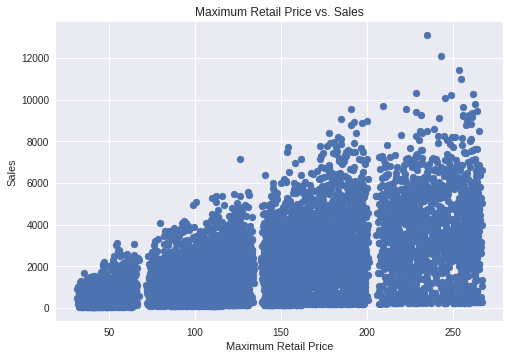

In [165]:
# Scatter plot: item MRP vs. sales
plt.style.use('seaborn')
plt.scatter(sales_prediction_df['Item_MRP'], sales_prediction_df['Item_Outlet_Sales'])
plt.xlabel('Maximum Retail Price')
plt.ylabel('Sales')
plt.title('Maximum Retail Price vs. Sales')

Text(0.5, 1.0, 'Item Type vs. Item Outlet Sales')

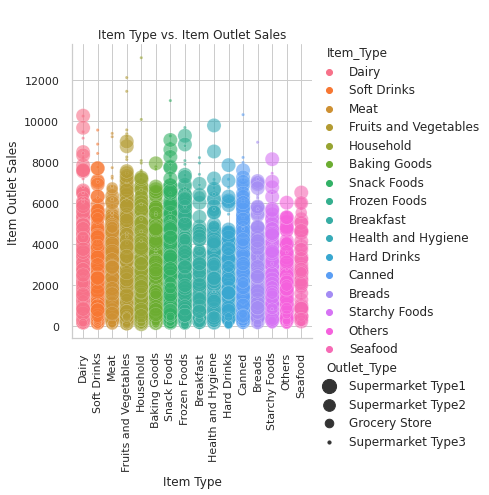

In [166]:
# Bubble plot: MRP vs. Sales based on item type
sns.set_theme(style='whitegrid')
g = sns.relplot(
    data=sales_prediction_df,
    x='Item_Type', y='Item_Outlet_Sales',
    hue='Item_Type', size='Outlet_Type', sizes=(10, 200),
    alpha=0.6
)
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Item Type vs. Item Outlet Sales')

Text(0.5, 1.0, 'Box Plot: Item Type vs. Item Outlet Sales')

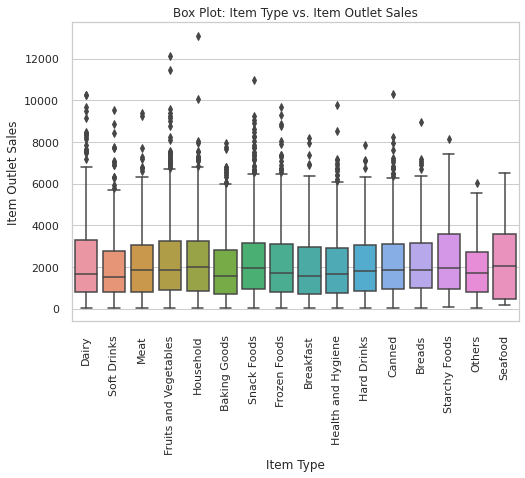

In [167]:
# Box plot: Item_Type vs sales
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=sales_prediction_df)
plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.title('Box Plot: Item Type vs. Item Outlet Sales')

Text(0.5, 1.0, 'Outlet Type vs. Item Outlet Sales')

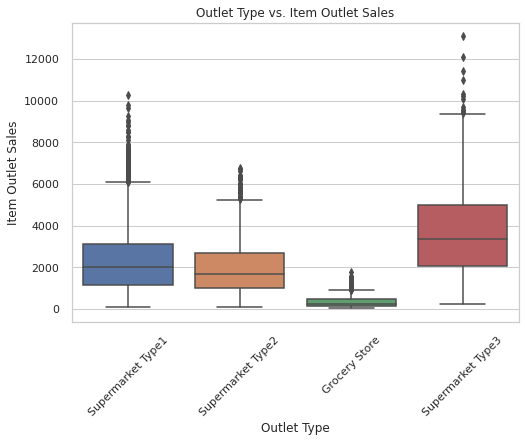

In [168]:
# Box plot: Outlet_type vs sales
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=sales_prediction_df)
plt.xticks(rotation=45)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.title('Outlet Type vs. Item Outlet Sales')

Text(0.5, 1.0, 'Establishment Year vs. Total Outlet Sales')

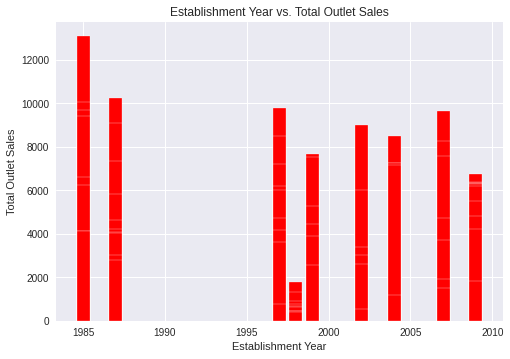

In [169]:
# Bar plot: year vs. sales
plt.style.use('seaborn')
plt.bar(x='Outlet_Establishment_Year', height='Item_Outlet_Sales', width=0.8, data=sales_prediction_df, color='red')
plt.xlabel('Establishment Year')
plt.ylabel('Total Outlet Sales')
plt.title('Establishment Year vs. Total Outlet Sales')

Text(0.5, 1.0, 'Item Visibility vs. Item Outlet Sales')

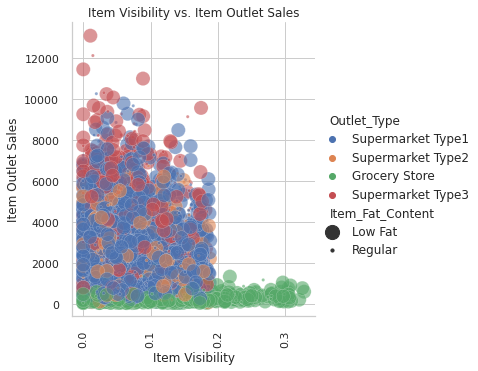

In [170]:
# Bubble plot: Item visibility vs item outlet sales based on outlet type and item fat content
sns.set_theme(style='whitegrid')
g = sns.relplot(
    data=sales_prediction_df,
    x='Item_Visibility', y='Item_Outlet_Sales',
    hue='Outlet_Type', size='Item_Fat_Content', sizes=(10, 200),
    alpha=0.6
)
plt.xticks(rotation=90)
plt.xlabel('Item Visibility')
plt.ylabel('Item Outlet Sales')
plt.title('Item Visibility vs. Item Outlet Sales')

##Data Preprocessing

In [171]:
# Determine X and y
X = sales_prediction_df.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = sales_prediction_df['Item_Outlet_Sales']

In [172]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

In [173]:
# Select columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

cat_columns = cat_selector(X_train)
num_columns = num_selector(X_train)

cat_data = X_train[cat_columns]
num_data = X_train[num_columns]

In [174]:
# Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the categorical values to the ohe
cat_ohe = ohe.fit_transform(cat_data)

# Instantiate SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer
mean_imputer = mean_imputer.fit(num_data)
freq_imputer = freq_imputer.fit(cat_data)

# Instantiate scaler
scaler = StandardScaler()

# Fit and transform to the Xtrain and Xtest
train_img = scaler.fit_transform(num_data)

# Make imputer pipeline for imputer, scaler and ohe
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

In [175]:
# Match pipe to column
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [176]:
# Make a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_selector),
        ("cat", cat_pipe, cat_selector),
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbc81b6ab50>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbc81b6af10>)])

In [177]:
# Fit with the Xtrain
X_train_processed = pd.DataFrame(preprocessor.fit_transform(X_train))

# Fit transformer with the Xtest
X_test_processed = pd.DataFrame(preprocessor.transform(X_test))

##Linear Regression

In [178]:
# Import and instantiate the model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [179]:
# Make a pipeline for columns transformation and linear regression
linreg_pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("linear regression", linreg)]
)

In [180]:
# Fit the data in the model using the pipe
linreg_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbc81b6ab50>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='i

In [181]:
# Predict
linreg_pipe.predict(X_test_processed)

array([1338.46425694, 2418.46425694, 1420.46425694, ..., 2925.46425694,
       1721.46425694, 3110.46425694])

In [182]:
# Evaluate the model
print(f'Train R2: {r2_score(y_train, linreg_pipe.predict(X_train_processed))}')
print(f'Test R2: {r2_score(y_test, linreg_pipe.predict(X_test_processed))}')

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, linreg_pipe.predict(X_train_processed)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, linreg_pipe.predict(X_test_processed)))}')

Train R2: 0.5626258637362764
Test R2: 0.5630097272113401
Train RMSE: 1140.480194885349
Test RMSE: 1089.470375818344


## Decision Trees

In [183]:
# Import the model
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
dec_tree = DecisionTreeRegressor()

In [184]:
# Create pipeline for the Decision Tree Regressor
dec_tree_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('decision trees', dec_tree)]
)

In [185]:
# Fit the model with the training data
dec_tree_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbc81b6ab50>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='i

In [186]:
# Predict with the test data
train_preds = dec_tree_pipe.predict(X_train_processed)
test_preds = dec_tree_pipe.predict(X_test_processed)

In [204]:
# Evaluate the model
train_score = dec_tree_pipe.score(X_train_processed, y_train)
test_score = dec_tree_pipe.score(X_test_processed, y_test)

print(f"Train score is {train_score}")
print(f"Test score is {test_score}")

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, dec_tree_pipe.predict(X_train_processed)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, dec_tree_pipe.predict(X_test_processed)))}')

Train score is 1.0
Test score is 0.12674229016287852
Train RMSE: 0.0
Test RMSE: 1540.1065044907232


In [188]:
# Get the depth
depth = dec_tree.get_depth()
print(depth)

# Get the leaf nodes
leaf_nodes = dec_tree.get_n_leaves()
print(leaf_nodes)

39
6265


In [189]:
# Initiate the list of depth
max_depth_range = list(range(2,39))

# Initiate an empty list
r2 = list()

# Create a for loop to fill out the list r2
for values in max_depth_range:
  dec_tree_pipe.fit(X_train, y_train)
  test_score = dec_tree_pipe.score(X_test, y_test)
  r2.append(test_score)

Text(0, 0.5, 'R2')

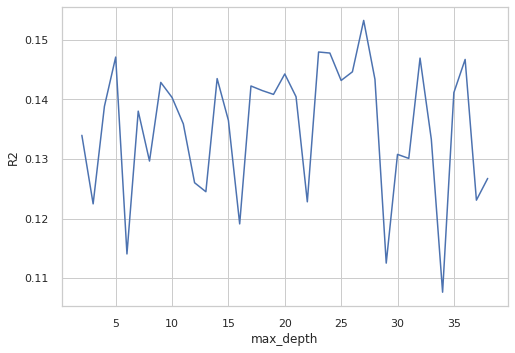

In [190]:
# Plot r2 vs. max depth
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2')

In [191]:
# Determine the optimal max_depth
dec_tree_24 = DecisionTreeRegressor(max_depth = 24, random_state = 101)
dec_tree_24.fit(X_train_processed, y_train)
train_24_score = dec_tree_24.score(X_train_processed, y_train)
test_24_score = dec_tree_24.score(X_test_processed, y_test)

print(f"Train score is {train_24_score}")
print(f"Test score is {test_24_score}")

Train score is 0.972610521064777
Test score is 0.1597331631511414


##Random Forest

In [192]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest
rf = RandomForestRegressor(random_state=101)

In [193]:
# Create a pipeline for the random forest
rf_pipe = Pipeline(
    steps=[('preprocessor', preprocessor), ('random forest', rf)]
)

In [194]:
# Fit the model with the training data
rf_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fbc81b6ab50>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='i

In [195]:
# Predict with the test set
rf_pipe.predict(X_test_processed)

array([1760.30862 , 3321.589646, 1364.803446, ..., 2905.431356,
       1882.702634, 2519.95313 ])

In [205]:
# Evaluate the model
rf_train_score = rf.score(X_train_processed, y_train)
rf_test_score = rf.score(X_test_processed, y_test)
print(f"Train score is {rf_train_score}")
print(f"Test score is {rf_test_score}")

print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, rf_pipe.predict(X_train_processed)))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, rf_pipe.predict(X_test_processed)))}')

Train score is 0.5240897199173034
Test score is 0.2994527848743891
Train RMSE: 430.8177756703634
Test RMSE: 1104.064470723058


In [197]:
# Optimize the model
[estimator.get_depth() for estimator in rf.estimators_]

[37,
 30,
 31,
 35,
 33,
 33,
 34,
 30,
 39,
 40,
 36,
 33,
 30,
 33,
 34,
 37,
 40,
 31,
 32,
 34,
 32,
 35,
 34,
 35,
 35,
 35,
 30,
 36,
 35,
 34,
 32,
 33,
 30,
 30,
 36,
 38,
 35,
 32,
 31,
 31,
 34,
 31,
 32,
 31,
 31,
 30,
 36,
 35,
 33,
 30,
 35,
 31,
 32,
 31,
 31,
 35,
 39,
 32,
 33,
 33,
 36,
 37,
 36,
 38,
 31,
 32,
 39,
 32,
 31,
 30,
 34,
 38,
 32,
 32,
 32,
 33,
 33,
 36,
 40,
 34,
 32,
 33,
 31,
 32,
 35,
 31,
 34,
 30,
 39,
 33,
 35,
 32,
 31,
 32,
 32,
 39,
 34,
 31,
 34,
 33]

In [201]:
# Evaluation using max_depth of 40
rf_40 = RandomForestRegressor(max_depth = 40, random_state = 101)
rf_40.fit(X_train_processed, y_train)
rf_40_train_score = rf_40.score(X_train_processed, y_train)
rf_40_test_score = rf_40.score(X_test_processed, y_test)
print(f"Train score is {rf_40_train_score}")
print(f"Test score is {rf_40_test_score}")

Train score is 0.9375884698614169
Test score is 0.5512238307196531


In [203]:
# Try 200 trees
rf_200 = RandomForestRegressor(n_estimators = 200, random_state = 101)
# Fit the model
rf_200.fit(X_train_processed, y_train)
# Obtain the scores
rf_200_train_score = rf_200.score(X_train_processed, y_train)
rf_200_test_score = rf_200.score(X_test_processed, y_test)
print(f"Train score is {rf_200_train_score}")
print(f"Test score is {rf_200_test_score}")

Train score is 0.9387783864395278
Test score is 0.5535709672105475
